In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv(r'C:\Users\fulian\Desktop\price - 副本.csv')
#df_train['price'].describe()
df_test=pd.read_csv(r"C:\Users\fulian\Desktop\test原版.csv")

Skewness: 11.365980
Kurtosis: 312.158134


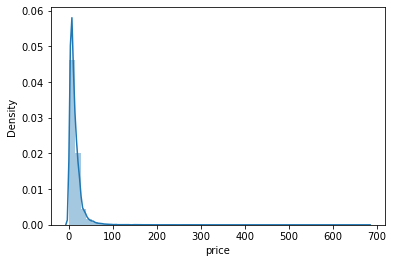

In [3]:
sns.distplot(df_train['price'])
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

<AxesSubplot:xlabel='mileage', ylabel='price'>

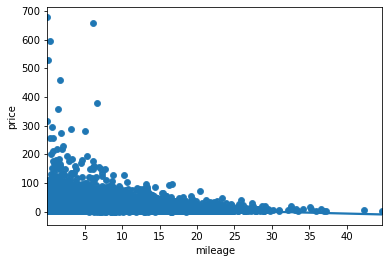

In [4]:
var = 'mileage'
#data = pd.concat([df_train['price'], df_train[var]], axis=1)
sns.scatterplot(x=df_train[var], y=df_train['price'])
sns.regplot(x=df_train[var], y=df_train['price'])

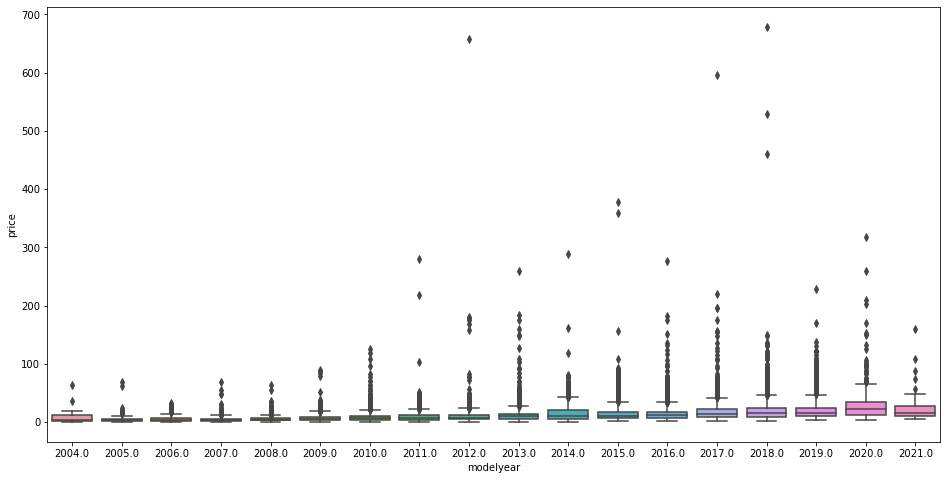

In [5]:
var = 'modelyear'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="price",data=data)
#fig.axis(ymin=0, ymax=800000)
#plt.xticks(rotation=90)

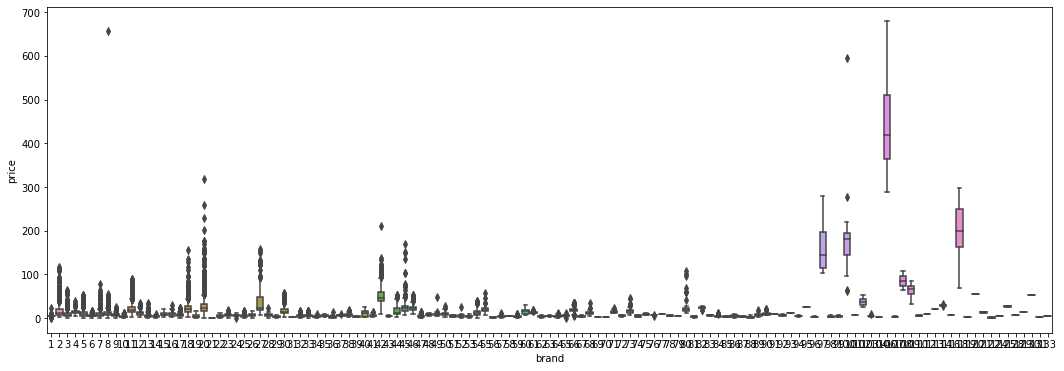

In [6]:
var = 'brand'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

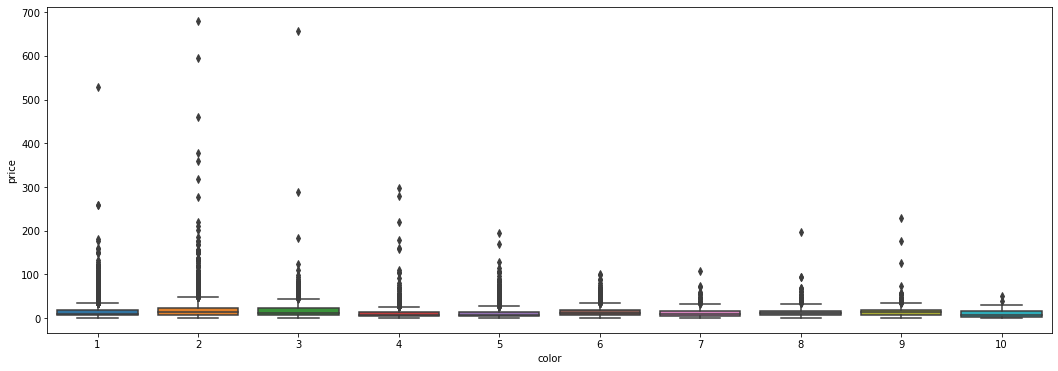

In [7]:
var = 'color'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

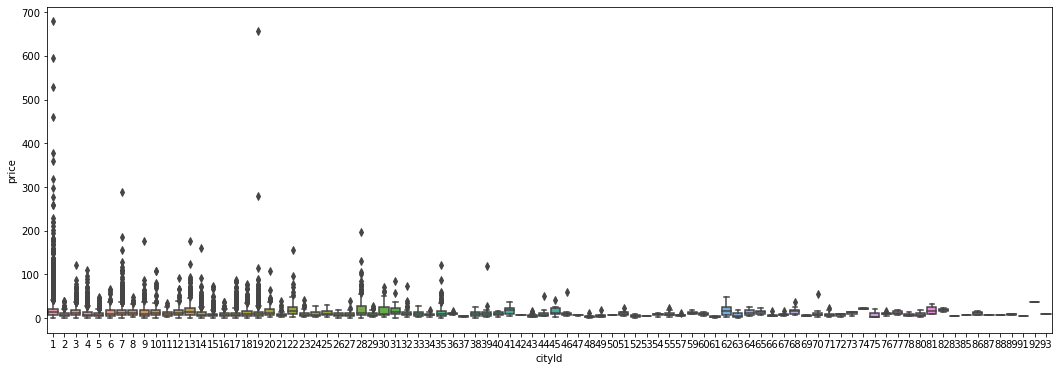

In [8]:
var = 'cityId'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 6))
fig = sns.boxplot(x=var, y="price", data=data)

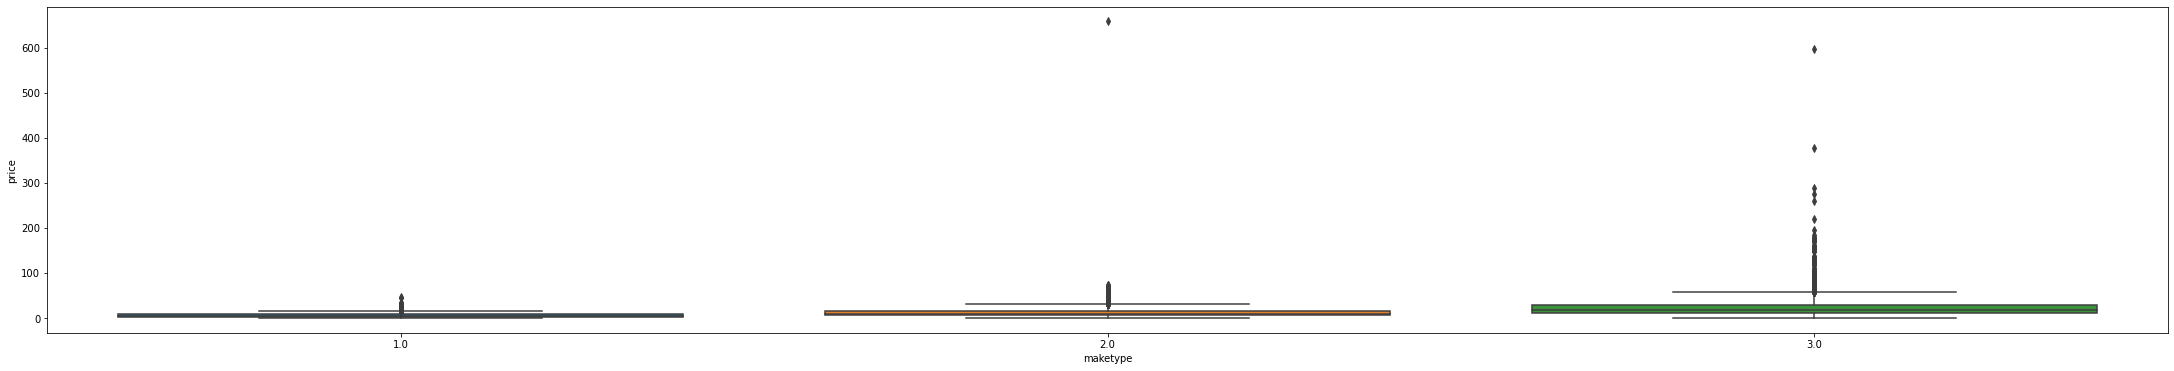

In [9]:
var = 'maketype'
data = pd.concat([df_train['price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(38, 6))
fig = sns.boxplot(x=var, y="price", data=data)

In [10]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
country,3757,0.125238
maketype,3641,0.121371
modelyear,312,0.010400
carCode,9,0.000300
gearbox,1,0.000033
carid,0,0.000000
registerDate,0,0.000000
newprice,0,0.000000
oiltype,0,0.000000
displacement,0,0.000000


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carid          29999 non-null  int64  
 1   tradeTime      29999 non-null  object 
 2   brand          29999 non-null  int64  
 3   serial         29999 non-null  int64  
 4   model          29999 non-null  int64  
 5   mileage        29999 non-null  float64
 6   color          29999 non-null  int64  
 7   cityId         29999 non-null  int64  
 8   carCode        29990 non-null  float64
 9   transferCount  29999 non-null  int64  
 10  seatings       29999 non-null  int64  
 11  registerDate   29999 non-null  object 
 12  licenseDate    29999 non-null  object 
 13  country        26242 non-null  float64
 14  maketype       26358 non-null  float64
 15  modelyear      29687 non-null  float64
 16  displacement   29999 non-null  float64
 17  gearbox        29998 non-null  float64
 18  oiltyp

In [12]:
related=df_train.corr()
related["price"].sort_values(ascending=False)

price            1.000000
newprice         0.764698
displacement     0.523038
maketype         0.379306
modelyear        0.263382
serial           0.166054
brand            0.144175
gearbox          0.143700
model            0.079039
transferCount    0.051490
seatings         0.012305
carid            0.007468
country          0.007135
oiltype          0.006624
carCode         -0.028417
color           -0.059879
cityId          -0.099401
mileage         -0.171435
Name: price, dtype: float64

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<AxesSubplot:>

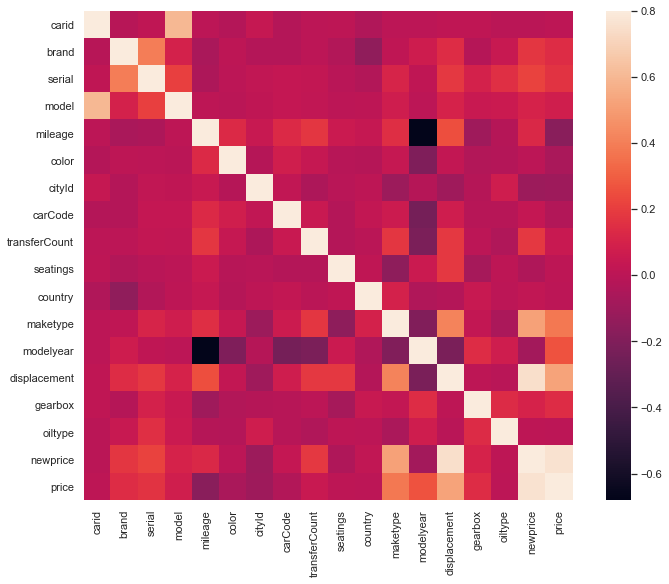

In [ ]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

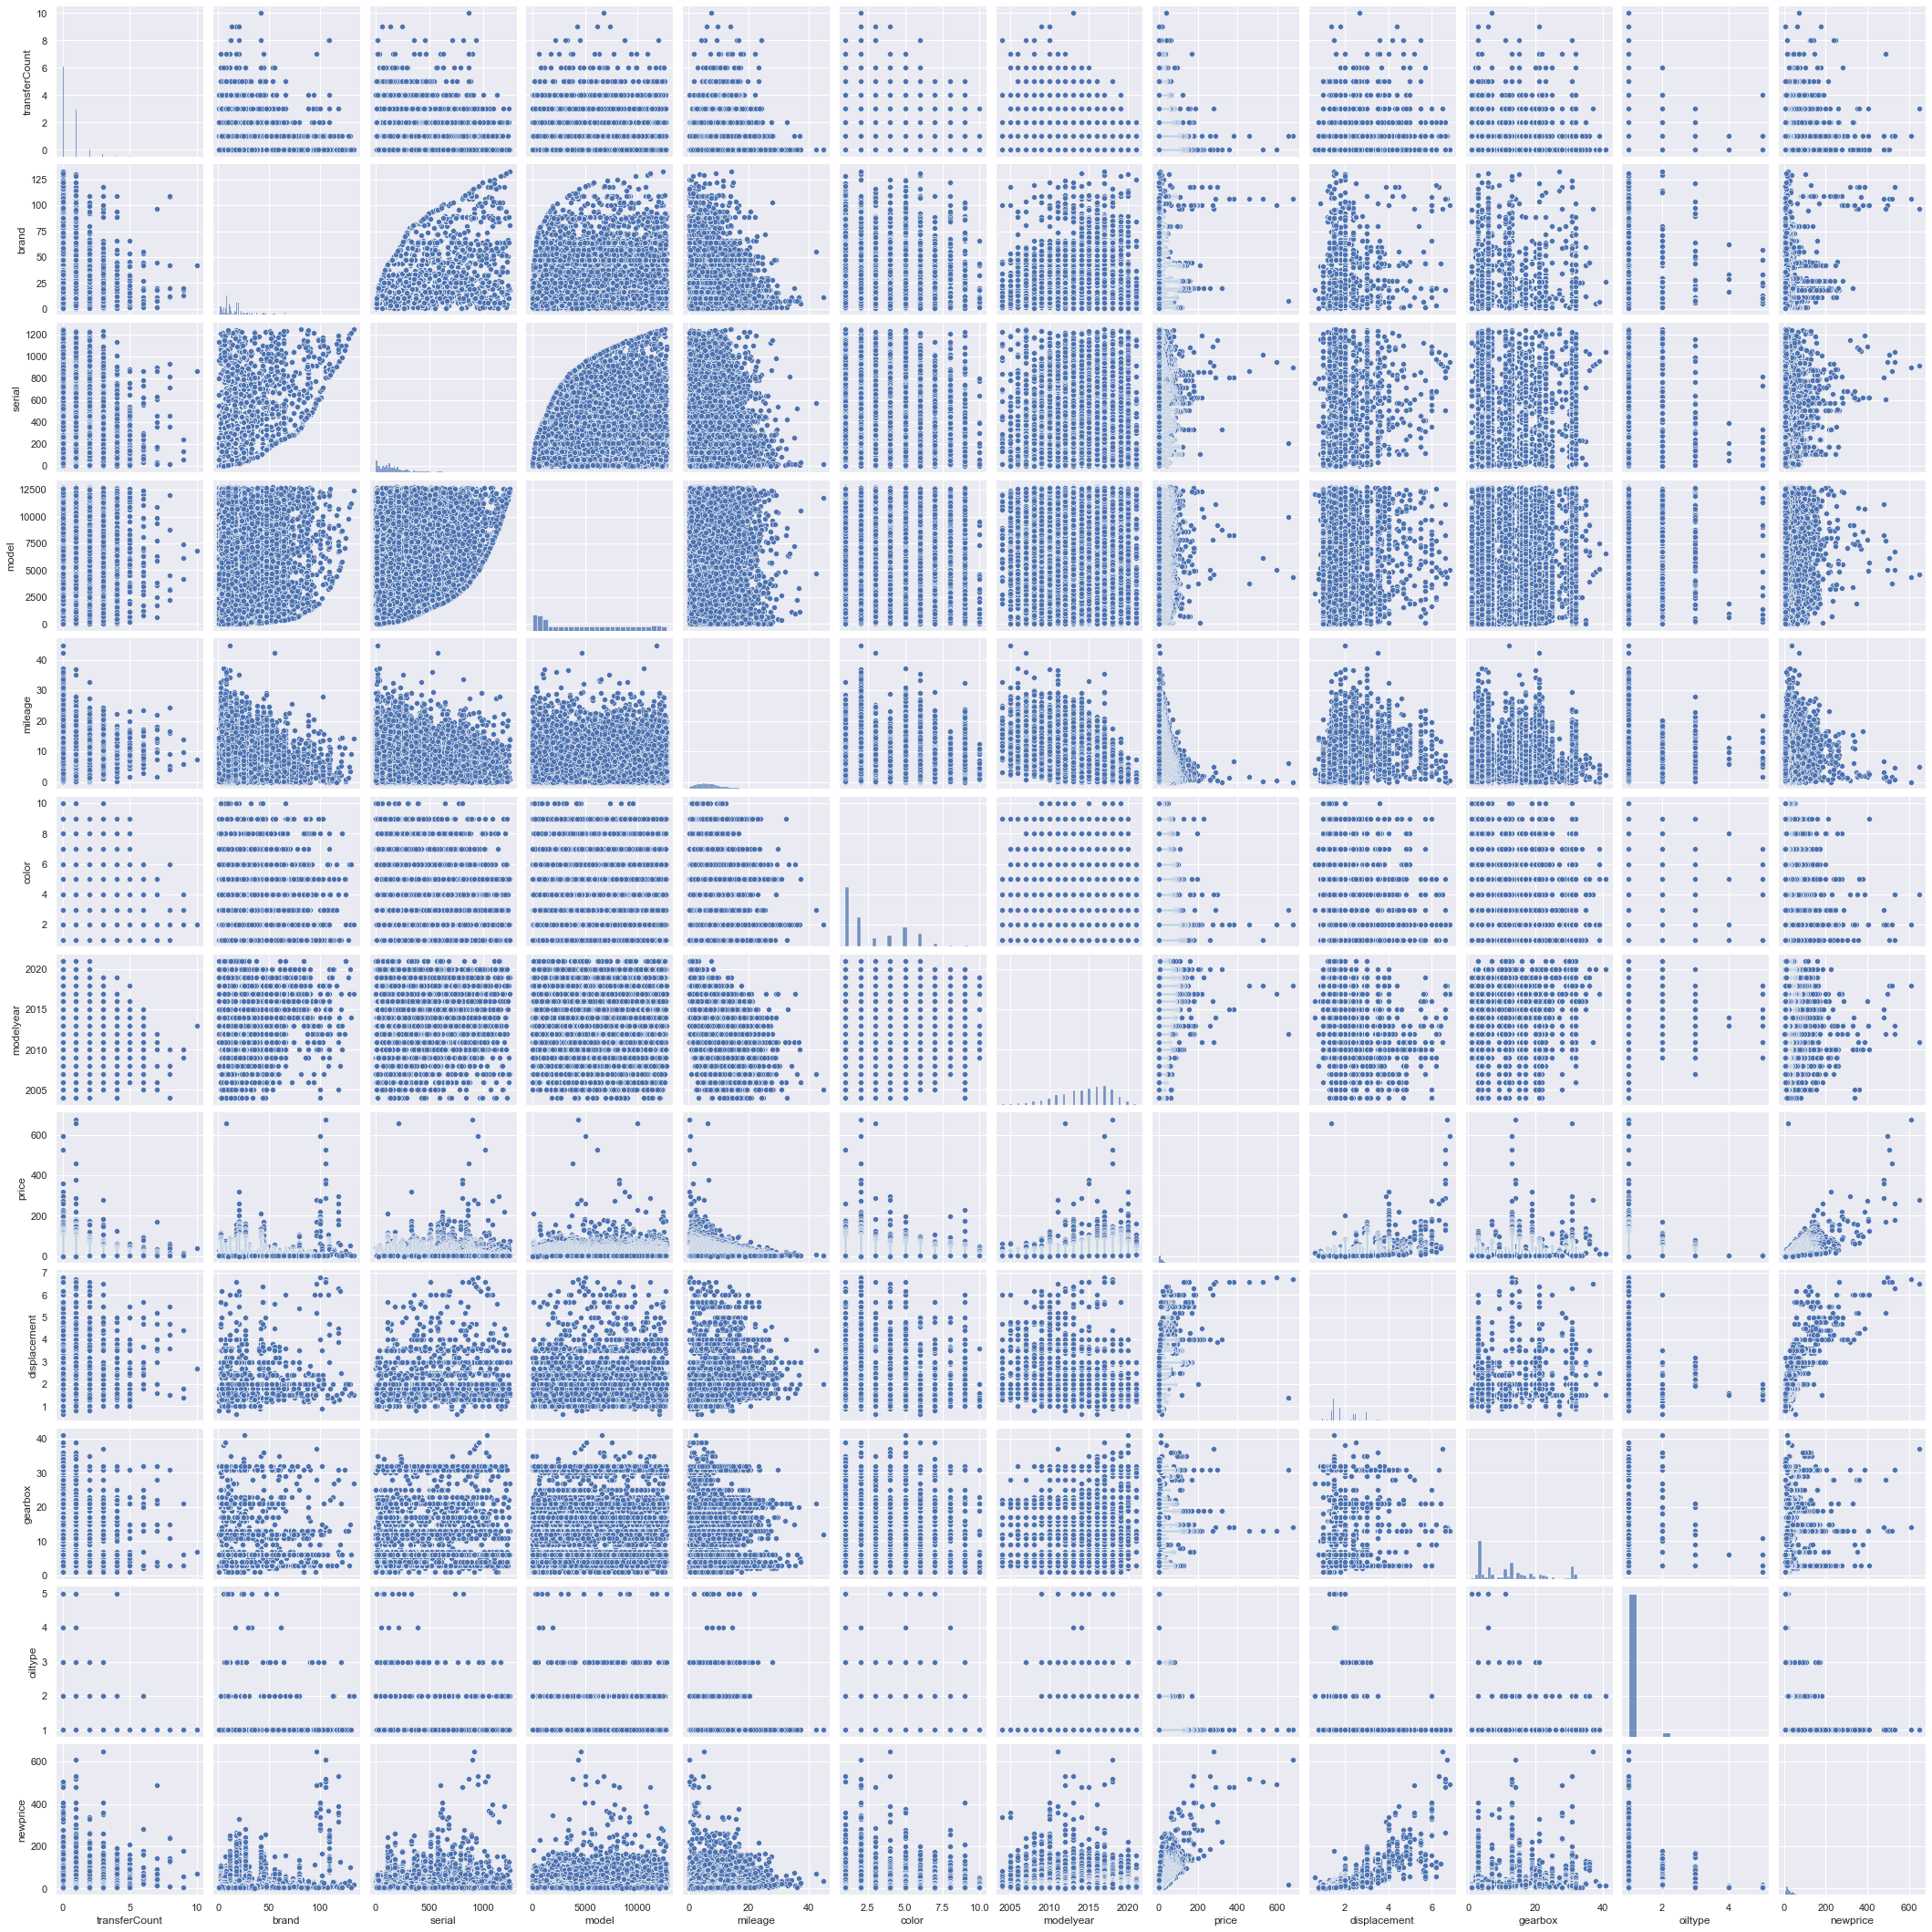

In [ ]:
sns.set()
cols = ['transferCount', 'brand', 'serial', 'model', 'mileage', 'color', 'modelyear','price','displacement','gearbox','oiltype','newprice']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()


 mu = 1.22 and sigma = 0.22



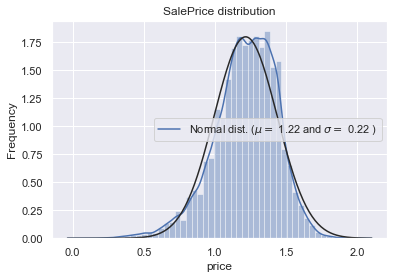

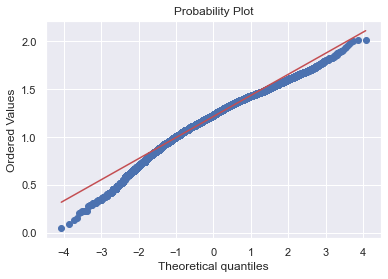

In [ ]:
df_train["price"] = np.log1p(df_train["price"])

#Check the new distribution 
sns.distplot(df_train['price'] , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['price'], plot=plt)
plt.show()

Text(0.5, 1.0, 'Percent missing data by feature')

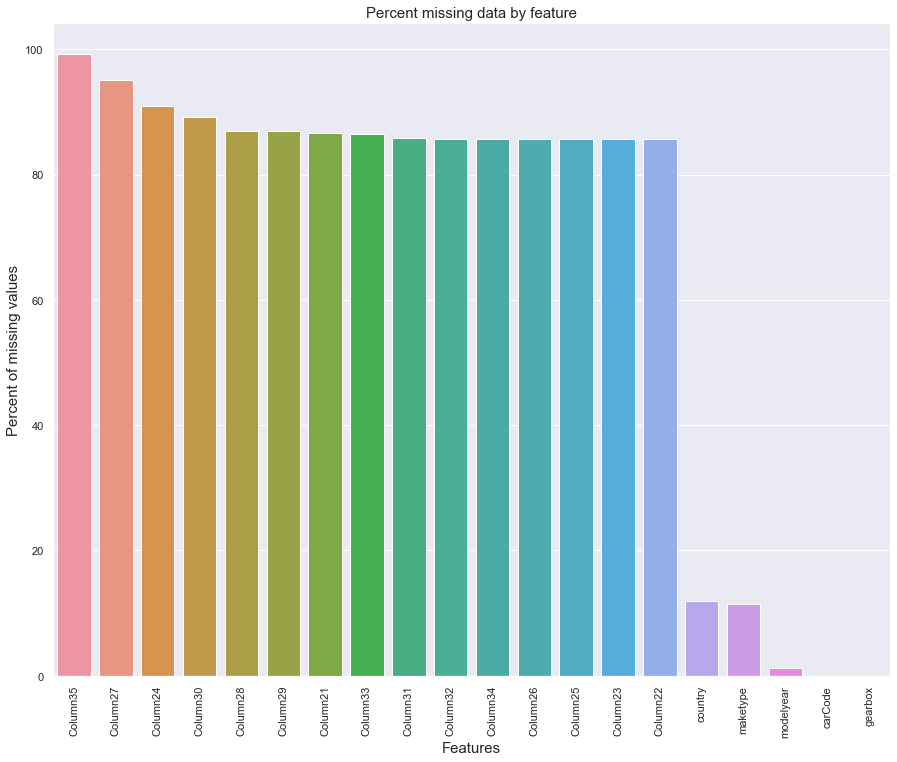

In [ ]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.price.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['price'], axis=1, inplace=True)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)